In [1]:

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:

#beg_date = datetime.datetime(2012, 1, 5)
#end_date = datetime.datetime(2012, 12, 1)
#df = dataRetrieve.get_data_yahoo('IBM') # always worth trying both yahoo and google in case one fails
#df.head()

In [3]:

df = pd.read_csv('market_data/BARC.L.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-09-16,282.665985,286.269012,278.001007,282.112000,250.591934,53489132
1,2013-09-17,281.927002,282.204010,273.013000,276.200012,245.340515,73143097
2,2013-09-18,284.000000,297.295013,275.350006,277.200012,246.228760,75208440
3,2013-09-19,282.200012,282.200012,277.500000,278.299988,247.205795,81062189
4,2013-09-20,277.850006,277.950012,272.700012,273.450012,242.897705,99305712


In [4]:

close_series = df['Adj Close']
close_series[:5]

0    250.591934
1    245.340515
2    246.228760
3    247.205795
4    242.897705
Name: Adj Close, dtype: float64

In [19]:

# note that shift is applied to second argument as series is ascending
# express returns as percentage
returns_series = (close_series/close_series.shift(1)-1)
returns_series

0            NaN
1      -0.020956
2       0.003620
3       0.003968
4      -0.017427
5      -0.025964
6       0.019148
7       0.005710
8      -0.013919
9      -0.012630
10     -0.001129
11      0.016196
12      0.010193
13      0.001651
14     -0.006044
15      0.004422
16     -0.015960
17     -0.001491
18      0.025019
19      0.012750
20     -0.004137
21      0.010836
22      0.013579
23     -0.018861
24     -0.001617
25     -0.011157
26     -0.007825
27     -0.016141
28     -0.006525
29      0.005442
          ...   
1234   -0.026917
1235    0.011579
1236   -0.000742
1237    0.004243
1238    0.019856
1239    0.004617
1240   -0.020157
1241   -0.016734
1242   -0.002927
1243   -0.022614
1244    0.013237
1245    0.002305
1246    0.006134
1247    0.003701
1248    0.004338
1249   -0.011123
1250    0.002839
1251    0.000218
1252   -0.012303
1253   -0.017306
1254   -0.014582
1255    0.010359
1256    0.019716
1257   -0.016683
1258   -0.010112
1259   -0.009648
1260    0.013181
1261   -0.0116

In [20]:

returns_series.describe()

count    1263.000000
mean       -0.000125
std         0.018407
min        -0.176785
25%        -0.009908
50%         0.000000
75%         0.009232
max         0.082004
Name: Adj Close, dtype: float64

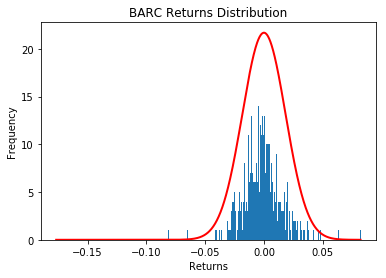

In [23]:
# histogram parameters
[n,bins,patches] = plt.hist(returns_series[1:], 1000)
mu = np.mean(returns_series)
sigma = np.std(returns_series)
x = stats.norm.pdf(bins, mu, sigma)

# plot return distribution histogram with normal dist
plt.plot(bins, x, color='red', lw=2)
plt.title('BARC Returns Distribution')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

